# Python como lenguaje de programación
--------------------------------------------------------------

## Introducción

En este capitulo vamos a explorar las particularidad de Python a la hora de  de escribir código.

Teniendo en cuenta que ya sabemos programar, no haremos una revisión exhaustiva de todos los elementos del lenguaje. Vamos a destacar aquellos propios de Python y, en particular, los que puedan llevar a error por su aparente similitud con otros lenguajes.

Para una visión mucho más extensa de este tema recomiendo visitar el [Tutorial oficial de Python3](https://docs.python.org/3/tutorial/)

## Variables / tipos

### Tipado
Python es un lenguaje de programación de tipado dinámico:
 - No tenemos que especificar el tipo de las variables.
 - Una variable puede almacenar distintos tipos de valores en distintos momentos.

In [15]:
a = 1
print(a, type(a))
a = 'foo'
print(a,type(a))

1 <class 'int'>
foo <class 'str'>


A su vez, tambien tiene tipado fuerte:
 - Si un dato es de un tipo concreto no se puede usar como si fuera de otro tipo

In [14]:
a = 'foo'
b = 100
print(a+chr(b))
print(a+b)


food


TypeError: must be str, not int

### None y del
_None_ es el único valor del tipo NoneType:
 - Representa una variable que no ha sido inicializada
 - Similar a puntero _NULL_
 - Una variable a _None_ no es lo mismo que una variable no definida

In [17]:
a = None
print(a, type(a))
print(c, type(c))

None <class 'NoneType'>


NameError: name 'c' is not defined

Al asignar _None_ a una variable borramos el dato guardado, pero no la variable.  
Para borrar completamente la variable hay que usar _del_

In [20]:
a = None
print(a)
del a
print(a)

None


NameError: name 'a' is not defined

### Tipos numéricos _int_ y _float_
Sólo hay dos tipos básicos para representar números _int_ para enteros y _float_ para punto flotante. La precisión viene fijada por el interprete que estemos usando.

In [25]:
a, b, c =  1, 1., 1.23456789123456789
print(a,type(a))
print(b, type(b))
print(c, type(c))

1 <class 'int'>
1.0 <class 'float'>
1.234567891234568 <class 'float'>


Podemos representar enteros en hexadecimal y en binario

In [3]:
a = 0xf0
b = 0b101
print(a,b)

240 5


### Cadenas de caractéres
Podemos usar comillas simples o dobles

In [31]:
a = 'Comillas simples'
b = 'Comillas dobles'
c = 'La cadena termina con el mismo tipo de "comillas" con el que empieza'
print(a, b)
print(c)

Comillas simples Comillas dobles
La cadena termina con el mismo tipo de "comillas" con el que empieza


Hay que distinguir entre las cadenas de símbolos ortograficos en sí, y las sequiencias de bytes que las representan.
 - Las cadenas de simbolos son objetos de tipo _str_
 - Las secuencias de bytes son objetos de tipo _bytes_

En Python3, por defecto, el texto entrecomillado se considera de tipo _str_ , para tomarlo como _bytes_ hay que poner una _b_ delante.

In [29]:
print(type('foo'), type(b'foo'))

<class 'str'> <class 'bytes'>


Para pasar de _str_ a _bytes_ podemos usar el método _encode_ que toma como parámetro el esquéma de codificación a utilizar (por defecto _UTF-8_ ).

In [22]:
print('foo', 'foo'.encode('utf-8'), 'foo'.encode('latin-1'))
print('bar', 'bar'.encode('utf-8'), 'bar'.encode('latin-1'))
print('🎵Daisy, Daisy, give me your answer do.🎵'.encode('utf-8'))
print('añejo', 'añejo'.encode('utf-8'), 'añejo'.encode('latin-1'))
print('foo'.encode('ascii'), 'añejo'.encode('ascii'))

foo b'foo' b'foo'
bar b'bar' b'bar'
b'\xf0\x9f\x8e\xb5Daisy, Daisy, give me your answer do.\xf0\x9f\x8e\xb5'
añejo b'a\xc3\xb1ejo' b'a\xf1ejo'


UnicodeEncodeError: 'ascii' codec can't encode character '\xf1' in position 1: ordinal not in range(128)

Para pasar de _bytes_ a _str_ usamos el método decode.

In [41]:
print(b'foo'.decode('utf-8'))
print(b'a\xc3\xb1ejo'.decode('utf-8'))
print(b'a\xc3\xb1ejo'.decode('latin-1'))

foo
añejo
aÃ±ejo


Los operadores _+_ y _*_ están sobrecargados para que funcionen con objetos _str_

In [42]:
a = 'foo'
b = 'bar'
print(a+b)
print(2*a + 3*b)

foobar
foofoobarbarbar


Para generar texto con formato podemos usar la función _format(\)_ o _f-strings_

In [11]:
name = 'Dave'
print('Hello, {}'.format(name))
print(f'Hello, {name}')

someInt = 9000
someFloat = 123.4567
print(f'Integer with min size: {someInt:8}; Float with max decimal places: {someFloat:.2f}')

Hello, Dave
Hello, Dave
Integer with min size: 9000    ; Float with max decimal places: 123.46


Por último tenemos las cadenas multi-linea, que se delimitan con tres comillas en cada extremo

In [19]:
song = """    🎵 Daisy, Daisy, give me your answer do. 
    I'm half crazy all for the love of  you.
    It won't be a stylish marriage, I can't afford a carriage.
    But you'll look sweet upon the seat of a bicycle built for two. 🎵"""
print(song)

    🎵 Daisy, Daisy, give me your answer do. 
    I'm half crazy all for the love of  you.
    It won't be a stylish marriage, I can't afford a carriage.
    But you'll look sweet upon the seat of a bicycle built for two. 🎵


### Iterables
Los iterables son objetos que se pueden recorrer secuencialmente y que almacenan o producen valores de otros tipos.


#### Contenedores
Contienen todos sus datos en memoria. Pueden tardar en inicializarse y consumir mucha memoria, pero una vez construidos el acceso a los miembros es instantaneo.

##### Listas y tuplas
Listas (*list*) y tuplas (*tuple*) son **secuencias ordenadas** de valores. Se puede acceder a un valor concreto mediante su índice. La numeración **empieza en 0**.

Las tuplas se delimitan con parentesis _\(\)_ y son **inmutables**

In [52]:
a = (1, 2, 3)
b = (1,)
c = (1, 'dos', None)
print(a,b,c)

(1, 2, 3) (1,) (1, 'dos', None)


In [54]:
a = (1,2,3)
print(a[0])
a[0] = 4
print(a[0])

1


TypeError: 'tuple' object does not support item assignment

Las listas se delimitan con corchete \[\] y son **mutables**

In [55]:
a = [1,2,3]
b = [1,]
c = [1,'dos',None]

In [57]:
a = [1,2,3]
print(a[0])
a[0] = 4
print(a[0])
a.append(5)
print(a)

1
4
[4, 2, 3, 5]


Tanto con listas como con tuplas podemos usar _slices_ para referirnos a un subconjunto de sus elementos. Se representan mediante _\[inicio:fin:paso\]_
Ojo que los indices no representan exactamente lo mismo cuando se refieren a un elemento que cuando se refieren a un *slice*\. Los _slices_ incluyen el elemento inicial, pero no el final.
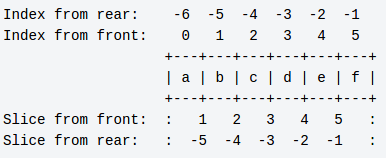
Se puede considerar que los _slices_ apuntan a la frontera entre 2 elementos como se ve en la imagen anterior.

In [52]:
a = ['a', 'b', 'c', 'd', 'e', 'f']
print(a[0], a[3])
print(a[0:3])
print()
print(a[1], a[-2])
print(a[1:-2])
print()
print(a[::2], a[::-1])

a d
['a', 'b', 'c']

b e
['b', 'c', 'd']

['a', 'c', 'e'] ['f', 'e', 'd', 'c', 'b', 'a']


##### Sets
Los sets son conjuntos **desordenados** de elementos **únicos** (sin repeticiones). Se delimitan con llaves

In [32]:
a = {1, 2, 3, 4, 5}
print(a)
a.add(6)
print(a)
a.discard(1)
print(a)
a.add(2)
print(a)

{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5, 6}
{2, 3, 4, 5, 6}
{2, 3, 4, 5, 6}


Podemos comprobar facilmente si un cierto elemento pertenece a un set. Tambien podemos realizar operaciones basicas de conjuntos.

In [41]:
a = {1,2,3,4}
b = {2,4,6,8}
print('Is 1 inside a?', 1 in a)
print('Is 5 inside a?',5 in a)

print(a.union(b))
print(a.difference(b))
print(a.intersection(b))

Is 1 inside a? True
Is 5 inside a? False
{1, 2, 3, 4, 6, 8}
{1, 3}
{2, 4}


##### Diccionarios
Los diccionarios (*dictionaries*) son conjuntos de **pares clave-valor** (*key-value*). Se definen mediante: *{clave1: valor1, clave2: valor2}*  
Se puede acceder directamente a un valor específico usando su clave y se puede usar casi cualquier tipo como clave.

In [8]:
a = {1:'primer valor', 'foo':['buzz', 'bar'], print: 23}
print(a[1], a['foo'], a[print])


primer valor ['buzz', 'bar'] 23


#### Iteradores
Los iteradores (*iterators*) producen los valores según los van necesitando. No tardan en inicializarse y no consumen memoria, pero sólo se puede acceder a los valores secuencialmente.

In [31]:
a = iter(range(0, 10))
print(next(a), next(a), next(a))

someList = ['foo', 'buzz', 'bar']
b = enumerate(someList)
print(next(b), next(b))

otherList = [10, 20, 30]
c = zip(someList, otherList)
print(next(c), next(c), next(c))
print(next(c))

0 1 2
(0, 'foo') (1, 'buzz')
('foo', 10) ('buzz', 20) ('bar', 30)


StopIteration: 

### Numpy.array
Los arrays de numpy no pertenecen a la libreria estandar, pero son practicamente indispensables para cualquier cálculo numérico y, además, se parecen mucho a las matrices de Matlab, así que los discutiremos brevemente.

Este tipo de datos se encuentra definido en la libreria _numpy_ así que lo primero es importar dicha libreria (suponiendo que ya la tenemos instalada)

In [34]:
import numpy

Podemos inicializarlos pasando una lista/tupla al constructor (sólo admite datos numericos o booleanos) o mediante _numpy.zeros(\)_\, _numpy.ones(\)_

In [48]:
arr1D = numpy.array([1,2,3])
arr2D = numpy.array(((1,2),(1,2),(1,2)))
print(arr1D)
print(arr2D)
print()
print(numpy.zeros([3,4]))
print(numpy.ones((4,2)))

[1 2 3]
[[1 2]
 [1 2]
 [1 2]]

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


Podemos acceder a elementos individuales mediante sus indices o a subconjuntos mediante slices.  
Para arrays bidimensionales el primer indice representa la fila y el segundo la columna 

In [35]:
a = numpy.array([[1,2],[3,4],[5,6]])
print(a)
print()
print(a[2,1])
print()
print(a[:,0])
print()
print(a[0:2,:])

[[1 2]
 [3 4]
 [5 6]]

6

[1 3 5]

[[1 2]
 [3 4]]


Aunque estos arrays se parecen a las listas, operan de manera distinta.  
Las operaciones con escalares se aplican a todos los elementos por igual:

In [37]:
a = numpy.zeros([2,3])
print(a+3)
b = numpy.ones([5])
print(b*5)

[[3. 3. 3.]
 [3. 3. 3.]]
[5. 5. 5. 5. 5.]


Las operaciones entre arrays se aplican entre elementos con los mismos indices:

In [ ]:
a = numpy.array([[1,2,3],[4,5,6]])
b = numpy.array([[10,20,30], [40,50,60]])
print(a+b)

Además, los propios arrays implementan otras operaciones matriciales:

In [46]:
a = numpy.array([[1,2,3],[4,5,6]])
print(a)
print()
print(a.max(), a.sum(axis=0))
print()
print(a.transpose())

[[1 2 3]
 [4 5 6]]

6 [5 7 9]

[[1 4]
 [2 5]
 [3 6]]


## Operadores
Python implementa los operadores típicos y funcionan como cabría esperar, aunque algunas clases sobrecargan operadores como hemos visto con las listas o los arrays de numpy.
### Matemáticos
Además de los típicos tenemos la potencia, division entera y modulo

In [51]:
print(2**3, 3**2)
print(5/2, 5//2)
print(8%3, 14%7)

8 9
2.5 2
2 0


### Lógicos
*None*, *0* y los contenedores vacios se consideran *False*. Todo lo demás se considera *True*

In [85]:
print(bool(None))
print(bool(-1), bool(0), bool(1))
print(bool([]), bool([None]))
print()
print(True and True, True and False, False and False, )
print(True or True, True or False, False or False)
print(not True)

False
True False True
False True

True False False
True True False
False


Los iterables se consideran iguales si todos sus elementos son iguales

In [73]:
print((1,2,3)==(1,2,3), (1,2,3)!=(1,2,3))
print()
print([1,2,3]==(1,2,3))
print((1,2,3)==(1,2,3,4))
print((1,2,3)==(1,2,4))

True False

False
False
False


Para ordenarlos se comparan los elementos de izquierda a derecha

In [75]:
print((1,2,3)<(1,2,4))
print((2,2,3)<(1,2,4))

True
False


Los arrays de numpy sin embargo devuelven otro array con los resultados de cada comparación elemento a elemento

In [79]:
print(numpy.array((1,2,3))==numpy.array((1,2,3)))
print(numpy.array((2,2,3)) < numpy.array((1,2,4)))

[ True  True  True]
[False False  True]


## Control del flujo
Los bloques de codigo se delimitan mediante la indentacíon. Cada vez que entramos en un bloque aumentamos un nivel de indentación y cada vez que salimos lo decrementamos.

### Condicionales
Las condicionales funcionan igual que en otros lenguajes, aunque *else if* se contrae como *elif*

In [109]:
a = int(input('Introduce un entero: '))
if a<0:
    print('Menor que cero')
elif a==0:
    print('Igual a cero')
else:
    print('Mayor que cero')

Introduce un entero: 1
Mayor que cero


### Bucles
#### Bucle indefinido (*while*)
El bucle se repite mientras la condicion sea cierta

In [92]:
i = 1
while i < 6:
    print(i)
    i += 1 

1
2
3
4
5


Con *break* podemos salir del bucle prematuramente

In [90]:
i = 1
while i < 6:
  print(i)
  if i == 3:
    break
  i += 1 

1
2
3


Con *continue* terminamos la iteración actual

In [93]:
i = 0
while i < 6:
  i += 1
  if i == 3:
    continue
  print(i)

1
2
4
5
6


#### Bucle sobre secuencias (*for*)
Al bucle for le pasamos un iterable y nos da un elemento de dicho iterable en cada iteración

In [110]:
fruits = ['apple', 'banana', 'cherry']
for x in fruits:
  print(x)

apple
banana
cherry


Si queremos recorrer una secuencia de numeros lo típico es usar *range*

In [111]:
for i in range(0,5):
    print(i**3)

0
1
8
27
64


Si queremos el elemento y su indice podemos usar *enumerate*

In [112]:
fruits = ['apple', 'banana', 'cherry']
for i, value in enumerate(fruits):
    print(i, value)

0 apple
1 banana
2 cherry


Y para trabajar con los pares clave-valor de un diccionario usamos su función *items*

In [105]:
myDict = {'color': 'blue', 'fruit': 'apple', 'pet': 'dog'}
for k, v in myDict.items():
    print(k, v)

color blue
fruit apple
pet dog


Por último, ambos bucles les podemos añadir un bloque *else* que no se ejecuta si salimos usando *break*

In [107]:
for i in range(3):
    password = input('Enter password: ')
    if password == 'secret':
        print('You guessed the password!')
        break
else:
    print('3 incorrect password attempts')

Enter password: asdf
Enter password: secret
You guessed the password!


### 
### try, except, else, finally


### with, \_\_enter\_\_, \_\_exit\_\_


## List comprehensions

## Funciones
### Definición de funciones
  - pass
  - Default values, positional/keyword arguments
  - args, kwargs
  - Doc strings
### Funciones como variables
  - Lambda expressions
  - Closures

## Clases
### Definición
  - \_\_init\_\_, \_\_del\_\_
  - Miembros privados
  - variables estáticas (ojo)
### Herencia
  - super()
  - @classmethod
  - @staticmethod

In [6]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [103]:
a = []
a[0] = 0

IndexError: list assignment index out of range

In [114]:
import myModule

In [115]:
myModule.someFunction

<function myModule.someFunction(a, b)>

In [119]:
myModule.someVariable

42

In [122]:
help(myModule)

Help on module myModule:

NAME
    myModule

CLASSES
    builtins.object
        someClass
    
    class someClass(builtins.object)
     |  someClass(value)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, value)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  getValue(self)
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)

FUNCTIONS
    someFunction(a, b)

DATA
    someVariable = 42

FILE
    d:\cogollo\documents\projects\dio2project\cursodio2\mymodule.py


